In [1]:
import json
import torch
import pandas as pd
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
from transformers import AutoTokenizer

/Users/lorenzocusin/Documents/Uni/master/xai/xai_project/venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
MODEL_NAME = "meta-llama/Llama-3.2-1B-Instruct"
PROMPT_END_TOKEN = ")Ċ_317"
PROMPT_END_POSITION = 317   # positions starts from 1
BINS_WIDTH = 5000

In [3]:
# reading the json file
with open('./results/all_shapley.json', 'r') as f:
    data = json.load(f)

In [4]:
# getting the adversarial tokens
adv_tokens = []
for run in data.values():
    tokens = list(run['tokens'].values())[PROMPT_END_POSITION:] # considering only the values in the range 
    for token in tokens:
        token_id = token['token_id']
        adv_tokens.append(token_id)

adv_tokens = torch.tensor(adv_tokens)
print(f"Total number of tokens: {adv_tokens.shape[0]} ")

Total number of tokens: 2587 


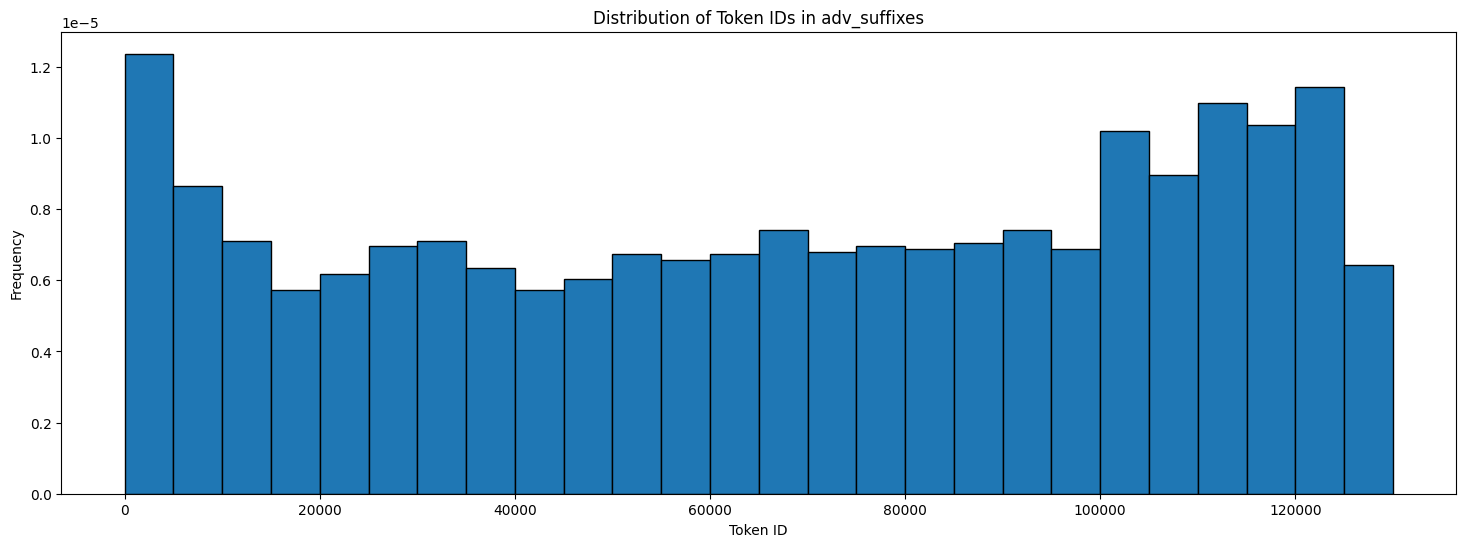

In [5]:
plt.figure(figsize=(18, 6))
plt.hist(
    adv_tokens,
    bins=range(0, int(max(adv_tokens)) + BINS_WIDTH, BINS_WIDTH),
    edgecolor='black',
    density=True
)
plt.xlabel('Token ID')
plt.ylabel('Frequency')
plt.title('Distribution of Token IDs in adv_suffixes')
plt.show()



In [6]:
# shapley value distribution
tokens_shap_relevances = torch.zeros_like(adv_tokens).to(torch.float)

i = 0
for run in data.values():
    tokens = list(run['tokens'].values())[PROMPT_END_POSITION:] # considering only the values in the range 

    for token in tokens:
        tokens_shap_relevances[i] = token['shapley_value']
        i += 1

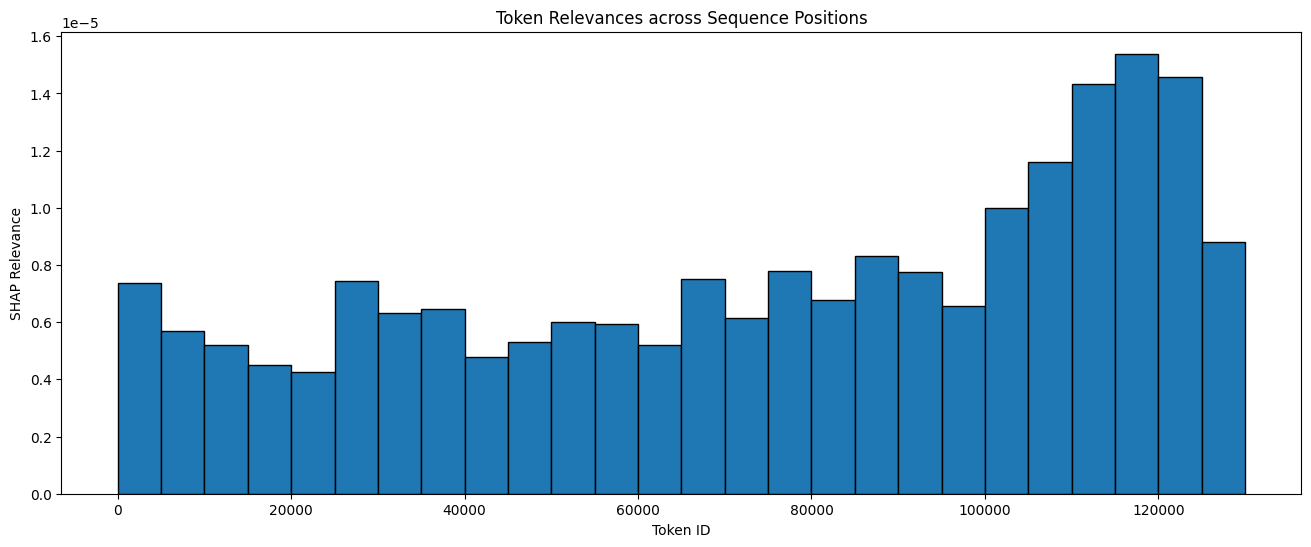

In [7]:
plt.figure(figsize=(16, 6))
plt.hist(
    adv_tokens,
    bins=range(0, int(max(adv_tokens)) + BINS_WIDTH, BINS_WIDTH),
    weights=tokens_shap_relevances,
    edgecolor="black",
    density=True
)
plt.xlabel('Token ID')
plt.ylabel('SHAP Relevance')
plt.title('Token Relevances across Sequence Positions')
plt.show()

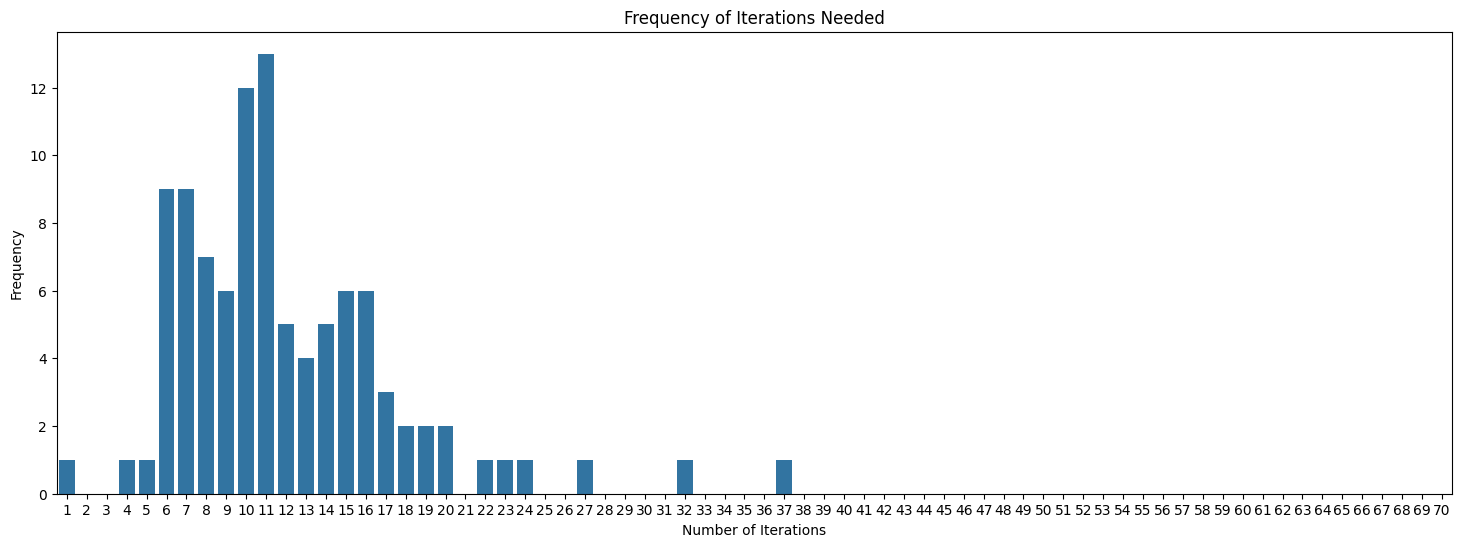

Mean: 11.98
Median: 11.98
Std: 5.66


In [19]:
normal_run_info = pd.read_csv("./suffix_results/normal_run.csv")
max_iterations = normal_run_info.groupby('run')['iteration'].max()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.countplot(x=max_iterations, order=range(1, 71))
plt.title('Frequency of Iterations Needed')
plt.xlabel('Number of Iterations')
plt.ylabel('Frequency')
plt.xticks(ticks=range(0, 70), labels=range(1, 71))
plt.show()

print(f"Mean: {max_iterations.mean():.2f}")
print(f"Median: {max_iterations.mean():.2f}")
print(f"Std: {max_iterations.std():.2f}")


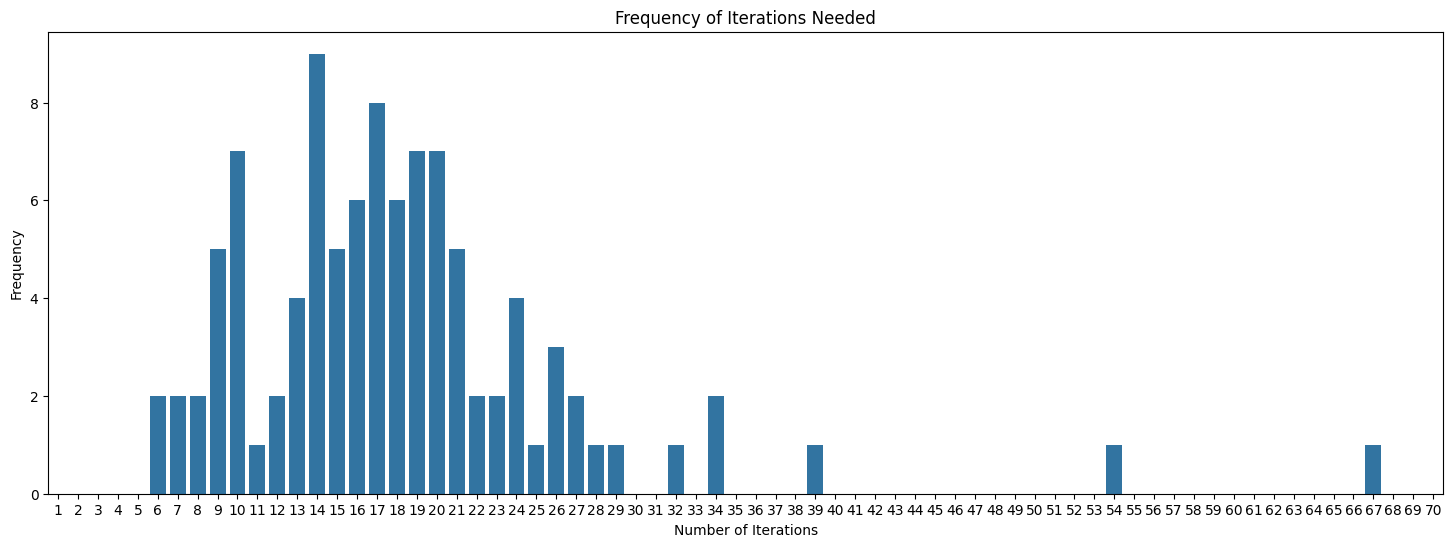

Mean: 18.23
Median: 18.23
Std: 8.87


In [20]:
safe_run_info = pd.read_csv("./suffix_results/safe_run.csv")
max_iterations = safe_run_info.groupby('run')['iteration'].max()
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))
sns.countplot(x=max_iterations, order=range(1, 71))
plt.title('Frequency of Iterations Needed')
plt.xlabel('Number of Iterations')
plt.ylabel('Frequency')
plt.xticks(ticks=range(0, 70), labels=range(1, 71))
plt.show()

print(f"Mean: {max_iterations.mean():.2f}")
print(f"Median: {max_iterations.mean():.2f}")
print(f"Std: {max_iterations.std():.2f}")